**Demo data**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_dir_path='./inputs/'
output_dir_path='./inputs/'
n=5
test=True

In [3]:
from htsimaging.lib.io import read_image
image_segmented=read_image(input_dir_path+'image_segmented.npy')
image_intensity=read_image(input_dir_path+'image_intensity.npy')

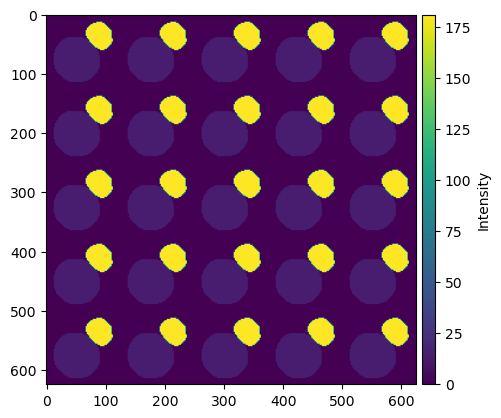

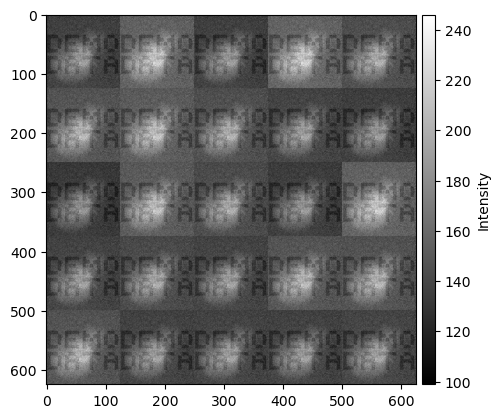

In [4]:
def get_image(
    image,
    n=5,
    vary=False,
    test=False,
    vary_scale=(0.9,1.1),
    cmap='binary_r',
    ):
    np.random.seed(n)
    if vary:
        muplipliers=np.random.uniform(low=vary_scale[0], high=vary_scale[1], size=n*n)
    k=0
    rows=[]
    for i in range(n):
        images=[]
        for j in range(n):
            images.append(image*muplipliers[k] if vary else image)
            k+=1
        rows.append(np.concatenate(images,axis=1))
    image=np.concatenate(rows,axis=0)
    if test:
        from htsimaging.viz.image import image_background
        fig,ax=plt.subplots()
        image_background(
            img=image,vmin=image.min(),vmax=image.max(),
            cmap=cmap,
            ax=ax)
    return image
image_segmented_cells=get_image(
    image=image_segmented,
    n=n,
    test=test,
    cmap='viridis',
    )
np.save(output_dir_path+'image_segmented_cells.npy',image_segmented_cells)

image_intensity_cells=get_image(
    image=image_intensity,
    n=n,
    vary=True,
    test=test,
    )
np.save(output_dir_path+'image_intensity_cells.npy',image_intensity_cells)

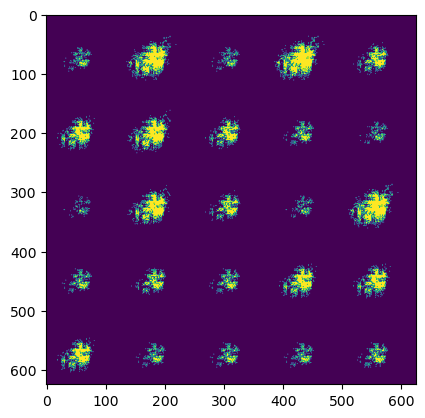

In [5]:
image_marker_cells=image_intensity_cells.copy()
image_marker_cells= image_marker_cells>np.quantile(image_marker_cells,0.95)
plt.imshow(image_marker_cells)
np.save(output_dir_path+'image_marker_cells.npy',image_intensity_cells)